<img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Nombre y Apellido: Rodrigo Alejandro Tirapegui

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin((2\pi.f_0 + \phi_0).k/f_s),\space\space \forall k \in \Bbb{Z} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [1]:
def generador_senoidal (fs, f0, N, a0=1, p0=0):

    """ 
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """ 
    # comienzo de la función
    
    ts = 1/fs # tiempo de muestreo
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (N-1)*ts, N).flatten()
    
    # señal senoidal
    signal = a0 * np.sin(2*np.pi*f0 * tt + p0)
   
    # fin de la función
        
    return tt, signal


Es decir que se podría invocar la señal que genere la ruido incorrelacionado de la siguiente manera:


In [1]:
def generador_ruido(fs, N, mu, std):
    
    """ 
    brief:  Generador de ruido incorrelacionado, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    mu:     media de la señal
    std:    varianza de la señal
    
    como resultado la señal devuelve:
    
    signal: ruido incorrelacionado evaluado en cada instante 
    tt:     base de tiempo de la señal
    """ 
    
    # comienzo de la función
    
    ts = 1/fs # tiempo de muestreo
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (N-1)*ts, N).flatten()

    signal = np.random.normal(mu, std, N)

    # fin de la función
    
    return tt, signal


Es decir que se podría invocar la señal que genere la cuadrada de la siguiente manera:


In [1]:
def generador_cuadrada (fs, f0, N, a0=1, d0=1):

    """ 
    brief:  Generador de señales cuadrada, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la cuadrada [Hz]
    a0:     amplitud pico de la señal [V]
    d0:     duty cycle de la señal cuadrada
    
    como resultado la señal devuelve:
    
    signal: cuadrada evaluada en cada instante 
    tt:     base de tiempo de la señal
    """ 
    # comienzo de la función
    
    ts = 1/fs # tiempo de muestreo
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (N-1)*ts, N).flatten()
    
    # señal cuadrada
    signal = a0 * sig.square(2*np.pi*f0*tt)
   
    # fin de la función
        
    return tt, signal


a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


Las señales senoidales se generan de la siguiente forma:


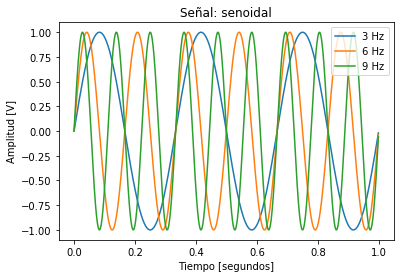

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Insertar aquí el código para inicializar tu notebook
########################################################

N  = 1000       # muestras
fs = 1000       # Hz
a0 = 1          # Volts
p0 = 0          # radianes

# Genero vector de frecuencias
ff = [3, 6, 9]

# Genero arreglo de vectores 
x = np.array([], dtype=np.float).reshape(N,0)

# Genero señales para cada frecuencia de ff
for i in range(0,3):
    [tt, signal] = generador_senoidal(fs, ff[i], N, a0, p0)
    x = np.hstack([x, signal.reshape(N,1)])

# Creo nuevo gráfico
plt.figure(1)

# Generar puntos de visualización de la señal
line_hdls = plt.plot(tt, x)

# Generar título de la figura
plt.title('Señal: senoidal') 

# Generar etiquetas de cada eje
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')

# Representar una leyenda para cada tipo de señal
axes_hdl = plt.gca()
axes_hdl.legend(line_hdls, [ str(f) + ' Hz' for f in ff ], loc='upper right'  )

# Mostrar la figura
plt.show()


Las señales de ruido incorrelacionado se generan de la siguiente forma:


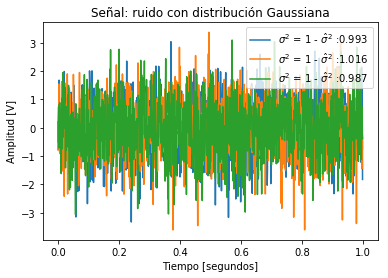

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Insertar aquí el código para inicializar tu notebook
########################################################

N  = 1000       # muestras
fs = 1000       # Hz
mu = 0          # Media
std = 1         # Varianza

# Genero vector de varianzas
std = [1, 1, 1]

# Genero arreglo de vectores 
x = np.array([], dtype=np.float).reshape(N,0)

# Genero señales para cada frecuencia de ff
for i in range(0,3):
    # [tt, signal] = generador_senoidal(fs, ff[i], N, a0, p0)
    [tt, signal] = generador_ruido(fs, N, 0, std[i])
    x = np.hstack([x, signal.reshape(N,1)])

# Creo nuevo gráfico
plt.figure(1)

# Generar puntos de visualización de la señal
line_hdls = plt.plot(tt, x)

# Generar título de la figura
#plt.title('Señal: senoidales') 
plt.title('Señal: ruido con distribución Gaussiana') 

# Generar etiquetas de cada eje
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')

# Representar una leyenda para cada tipo de señal
axes_hdl = plt.gca()
axes_hdl.legend(line_hdls, [ '$\sigma^2$ = ' + str(s) + ' - $\hat{{\sigma}}^2$ :{0:.3f}'.format(np.var(x[:,i])) for i,s in enumerate(std)], loc='upper right'  )

# Mostrar la figura
plt.show()


Las señales cuadradas se generan de la siguiente forma:


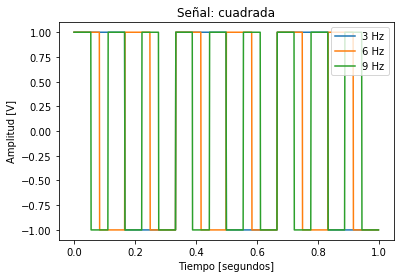

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Insertar aquí el código para inicializar tu notebook
########################################################

N  = 1000       # muestras
fs = 1000       # Hz
a0 = 1          # Volts
p0 = 0          # radianes

# Genero vector de frecuencias
ff = [3, 6, 9]

# Genero arreglo de vectores 
x = np.array([], dtype=np.float).reshape(N,0)

# Genero señales para cada frecuencia de ff
for i in range(0,3):
    [tt, signal] = generador_cuadrada(fs, ff[i], N, a0, p0)
    x = np.hstack([x, signal.reshape(N,1)])

# Creo nuevo gráfico
plt.figure(1)

# Generar puntos de visualización de la señal
line_hdls = plt.plot(tt, x)

# Generar título de la figura
plt.title('Señal: cuadrada') 

# Generar etiquetas de cada eje
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')

# Representar una leyenda para cada tipo de señal
axes_hdl = plt.gca()
axes_hdl.legend(line_hdls, [ str(f) + ' Hz' for f in ff ], loc='upper right'  )

# Mostrar la figura
plt.show()


In [10]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


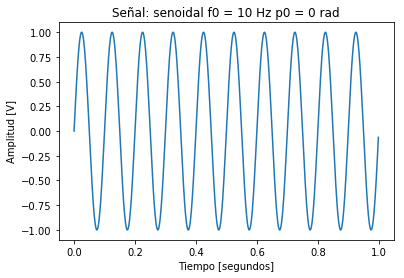

In [18]:
##################
# a.1) Senoidal #
#################

a0 = 1    # Volts
p0 = 0    # radianes
f0 = 10   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

# Generación de la señal senoidal
[tt, signal] = generador_senoidal(fs, f0, N, a0, p0)

# Creación nuevo gráfico
plt.figure(1)

# Generar puntos de visualización de la señal
line_hdls = plt.plot(tt, signal)

# Generar título de la figura
plt.title('Señal: ' + 'senoidal ' + 'f0 = ' + str(f0) + ' Hz' + ' p0 = ' + str(p0) + ' rad') 

# Generar etiquetas de cada eje
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')

#Ppresentar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

# Mostrar la figura
plt.show()


¿Podría inferir la frecuencia de la senoidal <b>a.1</b> a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si. Se corresponde a una señal senoidal de 10Hz, dado que en 1 segundo se observan 10 periodos de la señal
</div>

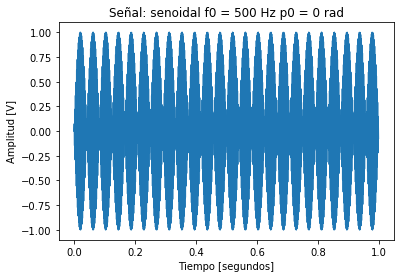

In [51]:
##################
# a.2) Senoidal #
#################

a0 = 1      # Volts
p0 = 0      # radianes
f0 = 500    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

# Generación de la señal senoidal
[tt, signal] = generador_senoidal(fs, f0, N, a0, p0)

# Creación nuevo gráfico
plt.figure(1)

# Generar puntos de visualización de la señal
line_hdls = plt.plot(tt, signal)

# Generar título de la figura
plt.title('Señal: ' + 'senoidal ' + 'f0 = ' + str(f0) + ' Hz' + ' p0 = ' + str(p0) + ' rad') 

# Generar etiquetas de cada eje
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')

#Ppresentar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

# Mostrar la figura
plt.show()

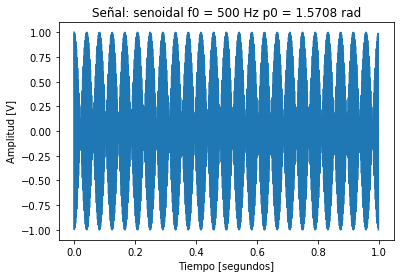

In [52]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = 500     # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

# Generación de la señal senoidal
[tt, signal] = generador_senoidal(fs, f0, N, a0, p0)

# Creación nuevo gráfico
plt.figure(1)

# Generar puntos de visualización de la señal
line_hdls = plt.plot(tt, signal)

# Generar título de la figura
plt.title('Señal: ' + 'senoidal ' + 'f0 = ' + str(f0) + ' Hz' + ' p0 = ' + str(round(p0,4)) + ' rad') 

# Generar etiquetas de cada eje
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')

# Resentar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

# Mostrar la figura
plt.show()

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No. En el caso a.3 se podría conocer solamente la amplitud de la senoidal; pero en ambos tanto la frecuencia como la fase no se pueden distinguir gráficamente.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En ambos casos la frecuencia de muestreo no cumple con el teorema de Nyquist, que demuestra que la reconstrucción exacta de una señal periódica continua en banda base a partir de sus muestras es posible si la tasa de muestreo es superior al doble de su ancho de banda. 
Tanto en a.2 como a.3 la frecuencia de muestreo es igual al dobre de su ancho de banda $(fs = 2.f0 = 1000 Hz)$, por lo que los puntos adquiridos pueden corresponderse a señales de múltiples frecuencias $f = (f0 - k.fs) \space\space \forall k \in \Bbb{Z}$
</div>

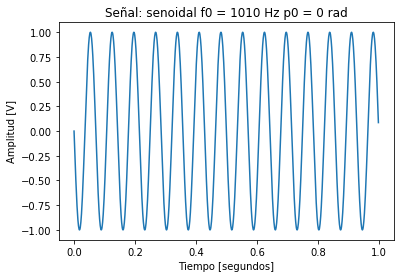

In [53]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = 1010  # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

# Generación de la señal senoidal
[tt, signal] = generador_senoidal(fs, f0, N, a0, p0)

# Creación nuevo gráfico
plt.figure(1)

# Generar puntos de visualización de la señal
line_hdls = plt.plot(tt, signal)

# Generar título de la figura
plt.title('Señal: ' + 'senoidal ' + 'f0 = ' + str(f0) + ' Hz' + ' p0 = ' + str(p0) + ' rad') 

# Generar etiquetas de cada eje
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')

# Resentar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

# Mostrar la figura
plt.show()

¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No es posible diferenciar las señales senoidales a.1 y a.4 a partir de sus gráficas. La ambigüedad surge de muestrear la señal a.4 a una frecuencia de muestreo inferior a Nyquist: es lo que se conoce como muestreo sub-Nyquist, "under-sampling" o simplemente "muestreo pasabanda" (f0 = 1010 Hz y fs = 1000 Hz).
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La ambigüedad puede evitarse haciendo que la frecuencia de muestreo de la seña a.4 sea superior a los 2020 Hz (es decir, cumpliendo con el teorema de Nyquist).
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

In [ ]:
# Código para calcular la DFT de una señal
###########################################

#%% Inicialización
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#%% Código de cálculo de la DFT
def dft(input):

    """ 
    brief:  Calculador de la Transformada discreta de fourier
    
    input:  vector de amplitud de una señal temporal muestreada y ventaneada
    
    como resultado la señal devuelve:
    
    output:  vector de amplitud de la dft de la señal de entrada (normalizada)
    """ 
    # comienzo de la función
    
    ## Obtengo la cantidad de muestras de la señal recibida
    N = len(input)
    
    ## Creo el vector de salida
    output = []
    
    # Para cada elemento del vector de salida
    for k in range(N):
        s = complex(0)
        
        # Para cada elemento del vector de entrada
        for n in range(N):
            angle = 2j * np.pi * n * k / N
            s += input[n] * np.exp(-angle)
        output.append(s)
    return (2/N)*np.abs(output)
    
    #fin de la función


A modo de ejemplo, se utiliza como entrada del algoritmo de la DFT la señal senoidal <b>a.1</b> y se grafica el espectro obtenido

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


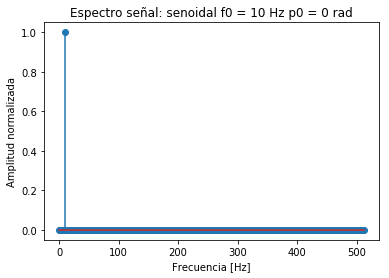

In [20]:
# Calculo de la DFT de la señal a.1
###################################

# Parámetros de la señal
N  = 1024 # muestras
fs = 1024 # Hz
a0 = 1    # Volts
p0 = 0    # radianes
f0 = 10   # Hz

# Generación de la señal senoidal
[tt, signal] = generador_senoidal(fs, f0, N, a0, p0)

# Cálculo de la DFT
spectrum_dft = dft(signal)

# Truncamiento a medio espectro (la otra mitad es repetición)
half_spectrum_dft = spectrum_dft[:N//2]

# Generación del vector de frecuencias
ff = np.linspace(0.0,fs/2,N/2)

# Creación de la figura 
plt.figure(1)

# Generar título de la figura
plt.title('Espectro señal: ' + 'senoidal ' + 'f0 = ' + str(f0) + ' Hz' + ' p0 = ' + str(p0) + ' rad') 

# Generar etiquetas de cada eje
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud normalizada')

# Representar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

# Generar puntos de visualización de la señal
plt.stem(ff, half_spectrum_dft)

# Mostrar la figura
plt.show()

<div class="alert alert-block alert-success">
<b>Nota:</b> Se observa un leve corrimiento del espectro de los 10 Hz que se debe a que los 0 Hz no son graficados en el punto justo.
</div>

<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada con la de la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

In [38]:
import timeit

the_start = timeit.timeit()
print("hello")
the_end = timeit.timeit()
print(the_start - the_end)


hello
-0.005137237003509654


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [58]:
#%% Inicialización
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.fftpack as sc
import time
from pandas import DataFrame
from IPython.display import HTML

#%% Generación de señales de prueba
def fft(input):
    """ 
    brief:  Calculador de la Transformada rápida de fourier
    
    input: vector de amplitud de una señal temporal muestreada y ventaneada
    
    como resultado la señal devuelve:
    
    output:  vector de amplitud de la fft de la señal de entrada
    """ 
    
    ## Calculo de la fft de la señal de entrada
    spectrum = (2/N)*np.abs(sc.fft(input))
    
    return spectrum

#%% Presentación de resultados

#######################################
# Tu simulación que genere resultados #
#######################################

# Parámetros de la señal
fs=128
a0=1
p0=0
f0=10

# Diccionario con los valores N
N_vector = [16, 32, 64, 128, 256, 512, 1024, 2048]

# Resultados de la DFT
tiempos_dft = np.empty(len(N_vector))

# Resultados de la FFT
tiempos_fft = np.empty(len(N_vector))

# Cálculo de timepos DFT
for idx, N in enumerate(N_vector):
    [tt, signal] = generador_senoidal(fs, f0, N, a0, p0) # Generación de la señal senoidal
    the_start = time.time()
    dft(signal)                                          # Cálculo de la DFT
    the_end = time.time()
    tiempos_dft[idx] = the_end - the_start
    
# Cálculo de timepos FFT
for idx, N in enumerate(N_vector):
    [tt, signal] = generador_senoidal(fs, f0, N, a0, p0) # Generación de la señal senoidal
    the_start = time.time()
    fft(signal)                                          # Cálculo de la FFT
    the_end = time.time()
    tiempos_fft[idx] = the_end - the_start
    

# Generación de resultados
resultados = [['DFT','FFT'], 
              [str(round(tiempos_dft[0],4)),str(round(tiempos_fft[0],4))],
              [str(round(tiempos_dft[1],4)),str(round(tiempos_fft[1],4))],
              [str(round(tiempos_dft[2],4)),str(round(tiempos_fft[2],4))],
              [str(round(tiempos_dft[3],4)),str(round(tiempos_fft[3],4))],
              [str(round(tiempos_dft[4],4)),str(round(tiempos_fft[4],4))],
              [str(round(tiempos_dft[5],4)),str(round(tiempos_fft[5],4))],
              [str(round(tiempos_dft[6],4)),str(round(tiempos_fft[6],4))],
              [str(round(tiempos_dft[7],4)),str(round(tiempos_fft[7],4))],
             ]
df = DataFrame(resultados, columns=['Tiempo dft (s)', 'Tiempo fft (s)'],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


,Tiempo dft (s),Tiempo fft (s)
Tamaño de la señal N,DFT,FFT
16,0.0156,0.0
32,0.0156,0.0
64,0.1306,0.0
128,0.3422,0.0
256,1.45,0.0
512,4.7395,0.0
1024,17.9954,0.0
2048,68.7195,0.0


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [23]:
#######################################
# Tu simulación que genere resultados #
#######################################
#%% Inicialización
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.fftpack as sc
from pandas import DataFrame
from IPython.display import HTML

# Parámetros de la señal
N=128
fs=128
a0=1
p0=0
f0=fs/4

# Diccionario con las frecuencias de desintonía
frecuencias_desintonia = [0.00, 0.01, 0.25, 0.5]

# Vector bidimensional con resultados
resultado = np.zeros((len(frecuencias_desintonia), 3))

# Resolución espectral
df = fs/N

for row, fd in enumerate(frecuencias_desintonia):
    [tt, signal] = generador_senoidal(fs, f0 + fd, N, a0, p0)          # Generación señal senoidal   
    spectrum_fft = fft(signal)                                         # Cálculo de la FFT
    half_spectrum_fft = spectrum_fft[:N//2]                            # Trunco el espectro a la mitad de la muestras
    resultado[row][0] = half_spectrum_fft[int((f0 + fd)/df)]           # Almaceno módulo de la frecuencia central
    resultado[row][1] = half_spectrum_fft[int((f0 + fd)/df) + 1]       # Almaceno módulo del primer adyacente
    half_spectrum_fft[int((f0 + fd)/df)] = 0                           # Elimino muestra de la frecuencia central
    resultado[row][2] = sum(np.power(half_spectrum_fft, 2))            # Calculo potencia de resto de frecuencias
    
# Generación de resultados
tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                   [str(round(resultado[0][0],4)),str(round(resultado[0][1],4)),str(round(resultado[0][2],4))],
                   [str(round(resultado[1][0],4)),str(round(resultado[1][1],4)),str(round(resultado[1][2],4))],
                   [str(round(resultado[2][0],4)),str(round(resultado[2][1],4)),str(round(resultado[2][2],4))],
                   [str(round(resultado[3][0],4)),str(round(resultado[3][1],4)),str(round(resultado[3][2],4))],
                 ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,1.0,0.0,0.0
$f_S/4+0.01$,0.9998,0.0101,0.0003
$f_S/4+0.25$,0.8948,0.3056,0.1914
$f_S/4+0.5$,0.6365,0.6369,0.5949


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

In [26]:
# Inserte aquí su código

# Parámetros de la señal
N=128
fs=128
a0=1
p0=0
fd=0.5
f0=fs/4

resultado = np.empty(3)                                         # Vector unidimensional con resultados
[tt, signal] = generador_senoidal(fs, f0 + fd, N, a0, p0)       # Generación señal senoidal 
signal = np.pad(signal, (int(N/10), int(10*N)), 'constant')     # Agrego zeros (zero padding)
spectrum_fft = fft(signal)                                      # Cálculo de la FFT
N_prima = len(signal)                                           # Obtengo el largo de la señal con ceros
df = fs/N_prima                                                 # Obtengo la nueva resolución espectral
half_spectrum_fft = spectrum_fft[:N_prima//2]                   # Trunco el espectro a la mitad de la muestras
resultado[0] = half_spectrum_fft[int((f0 + fd)/df)]             # Almaceno módulo de la frecuencia central
resultado[1] = half_spectrum_fft[int((f0 + fd)/df) + 1]         # Almaceno módulo del primer adyacente
tmp = half_spectrum_fft[int((f0 + fd)/df)]                      # Almaceno la componente de la frecuencia principal
half_spectrum_fft[int((f0 + fd)/df)] = 0                        # Elimino muestra de la frecuencia central
resultado[2] = sum(np.power(half_spectrum_fft, 2))              # Calculo potencia de resto de frecuencias
    
half_spectrum_fft[int((f0 + fd)/df)] = tmp                      # Reestablezco la componente de la frecuencia principal
ff = np.linspace(0.0, fs/2, N_prima/2)                          # Genero vector de muestras de frecuencia

# Generación de resultados
tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                   [str(round(resultado[0],4)),str(round(resultado[1],4)),str(round(resultado[2],4))],
                 ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4+0.5$,0.996,0.9973,10.1018


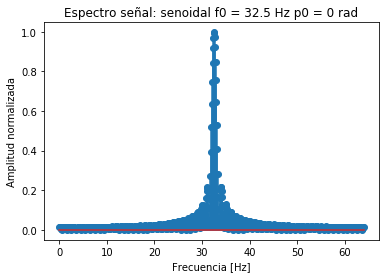

In [27]:
# Creación de la figura 
plt.figure(1)

# Generar título de la figura
plt.title('Espectro señal: ' + 'senoidal ' + 'f0 = ' + str(f0 + fd) + ' Hz' + ' p0 = ' + str(p0) + ' rad') 

# Generar etiquetas de cada eje
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud normalizada')

# Representar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

# Generar puntos de visualización de la señal
plt.stem(ff, half_spectrum_fft)

# Mostrar la figura
plt.show()

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
    <b>Respuesta:</b> La resolución espectral de <b>3.b</b> es $fs/N = 128/1420 = 0.09 Hz$, mientras que la resolución espectral de <b>3.a</b> es $fs/N = 128/128 = 1 Hz$
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La resolución espectral está dada por la separación entre las muestras en frecuencia que es $1/Tadq$, es decir, la reciproca del ancho de ventana. Lo que significa que la misma aumenta al aumentar $Tadq$.
Como $Tadq = N.Ts$ se tienen dos posisbilidades. Una es aumentar $Ts$ y la otra es aumentar $N$. El valor de $Ts$ normalemnte es fijo dado que lo impone el hardware, así que sólo queda aumentar $N$ para obtener una mejor resolución.
    Por lo tanto, la técnica de "zero padding" consiste en agregar ceros con el objetivo de mejorar la calidad visual del espectro, enfatizando el hecho de que agregar ceros no altera en nada el espectro de la señal original; dado que lo que ocurre es que el espectro ahora contiene muestras adicionales entre las originales.
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [33]:
#######################################
# Tu simulación que genere resultados #
#######################################
def estimador_f_fundamental(sprectrum, df):

    # Obtengo la máxima componente del espectro
    spec_max = np.amax(sprectrum)
    
    # Genero arreglo con los índices de los máximos en el espectro
    spec_max_idx = np.where(sprectrum == spec_max)
    
    # Obtengo el índice de la frecuencia fundamental estimada
    f0_idx = sum(spec_max_idx)/len(spec_max_idx)

    # Obtengo el valor de la frecuencia fundamental estimada
    f0_estimada = f0_idx*df  
    
    return f0_estimada, spec_max 

# Parámetros de la señal
N=128
fs=128
a0=1
p0=0
fd=0.5
f0=fs/4

[tt, signal] = generador_senoidal(fs, f0 + fd, N, a0, p0)                             # Generación señal senoidal 
signal = np.pad(signal, (int(N/10), int(10*N)), 'constant')                           # Agrego zeros (zero padding)
spectrum_fft = fft(signal)                                                            # Cálculo de la FFT
N_prima = len(signal)                                                                 # Obtengo el largo de la señal con ceros
df = fs/N_prima                                                                       # Obtengo la nueva resolución espectral
half_spectrum_fft = spectrum_fft[:N_prima//2]                                         # Trunco el espectro a la mitad de la muestras
[f0_estimada, spec_f0_estimada_max] = estimador_f_fundamental(half_spectrum_fft, df)  # Obtengo la frecuencia estimada y el valor 
                                                                                      # del espectro en la frecuencia teorica

e_percentage = np.abs(half_spectrum_fft[int(f0/df)] - spec_f0_estimada_max) * 100     # Calculo el error porcentual

# Generación de resultados
resultados = [ ['$ \lvert e_\% \lvert$'], 
               [''], 
               [str(round(e_percentage,4))]
             ]
df = DataFrame(resultados, columns=['$e_\%$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4''vs.''f_S/4+0.5$'])
HTML(df.to_html())


,$e_\%$
$f_0$ \ expr. matemática,$ \lvert e_\% \lvert$
,
$f_S/4 vs. f_S/4+0.5$,36.0791


<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.a) Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [27]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.b) **1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [166]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.c) 1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [167]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.d) 1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [168]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.e) Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [169]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.f) Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [170]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.g) Idem anterior, pero cada ciclo con amplitudes (1, 5, 3).</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [171]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.h) Idem patrón anterior, pero repetido 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [172]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.i) En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [173]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

In [186]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ], 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

In [187]:
#####################################
# Tu simulación que genere gráficas #
#####################################


¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [188]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [189]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,,,
8 bits,,,
16 bits,,,


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>